In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO

In [10]:
# Load a more complex model with feature extraction (Variation)
model_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
model = hub.KerasLayer(model_url, input_shape=(224, 224, 3), trainable=False)

In [11]:
# Alternative image URL due to access restrictions (using an Unsplash image instead)
alternative_image_url = "https://images.unsplash.com/photo-1506748686214-e9df14d4d9d0"


In [12]:
# Load and preprocess an example image (Variation: different preprocessing pipeline)
def load_and_preprocess_image(image_url):
    headers = {'User-Agent': 'Mozilla/5.0'}  # Set a User-Agent to avoid 403 errors
    response = requests.get(image_url, headers=headers)
    response.raise_for_status()  # Ensure request was successful
    image = Image.open(BytesIO(response.content)).convert("RGB")
    image = image.resize((224, 224))
    img_array = np.array(image) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return image, img_array


In [13]:
# Load alternative image
image, processed_image = load_and_preprocess_image(alternative_image_url)


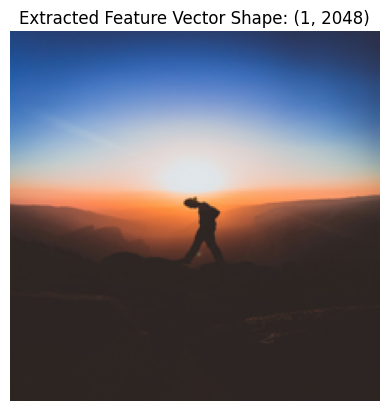

In [14]:
# Extract features instead of classification
features = model(processed_image)

# Display results
plt.imshow(image)
plt.title(f"Extracted Feature Vector Shape: {features.shape}")
plt.axis("off")
plt.show()